In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import re

In [2]:
births = pd.read_csv('../data/raw/totSampDF18.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,5,10,12,13,15,17,18,19,20,21,22,26,27,28,29,30,31,32,33,34,35,36,37,47,48,54,63,64,73,75,105) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Columns of interest  
Mom age C  
Mom’s age to first baby C  
Weeks born early starting at 35-40 M  
Avg BirthWeights M  
Multiple Births C  
Plurality C  
Method of Birth M  
Birth Place M  
BMI / Mom’s weight / weight gain M&C 


In [49]:
colnames = np.array(births.columns)
colnames

array(['Unnamed: 0', 'birth_year', 'birth_month', 'birth_time',
       'birth_day_of_wk', 'birth_place', 'mothers_age_imputed',
       'mothers_age', 'mothers_nativity', 'mothers_residence_status',
       'mothers_race', 'mothers_race_imputed', 'mothers_hispanic_origin',
       'mothers_hispanic_origin2', 'paternity_acknow',
       'mothers_marital_status', 'mothers_maristat_imputed',
       'mothers_education', 'fathers_age', 'fathers_race',
       'fathers_hispanic_origin', 'fathers_hispanic_origin2',
       'fathers_education', 'prior_living_births', 'prior_dead_births',
       'prior_terminations', 'mo_since_last_live_birth',
       'mo_since_last_other_birth', 'mo_prenatal_care_began',
       'n_prenatal_visits', 'wic', 'cigs_tri1', 'cigs_tri2', 'cigs_tri3',
       'mothers_height', 'mothers_bmi', 'pre_preg_lbs', 'delivery_lbs',
       'pre_preg_diab', 'gest_diab', 'pre_preg_hypten', 'gest_hypten',
       'hypten_ecl', 'prev_preterm_birth', 'infertility_treatment',
       'fertil_

## Baby weight time series

In [22]:
babywt = births[['birth_year', 'birth_month','birth_time','birth_weight_gm']]


In [23]:
meanwt_ts = babywt.groupby(['birth_year','birth_month'])['birth_weight_gm'].mean()

### Monthly Mean and Median birth weight by year

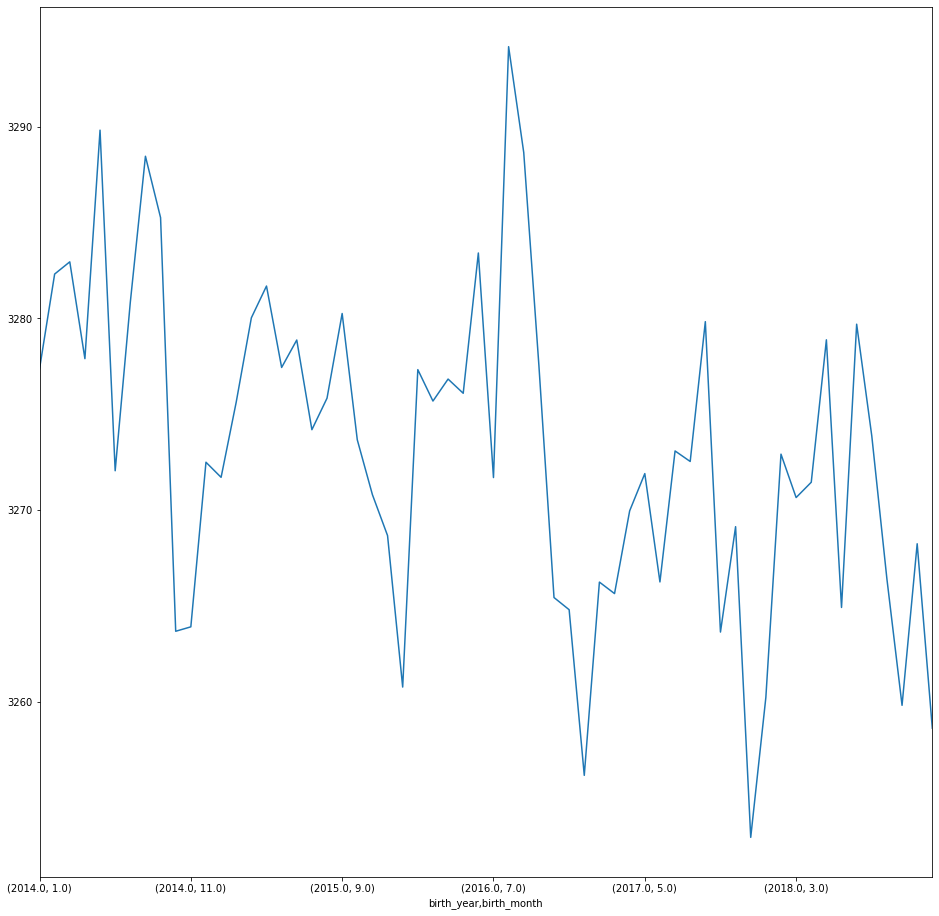

In [24]:
plt.figure(figsize=(16,16))

meanwt_ts.plot()
# plt.xlabel('Number of cases of Plurality')
# plt.ylabel('Years based on amount of Twins')

In [ ]:
medwt_ts = babywt.groupby(['birth_year','birth_month'])['birth_weight_gm'].median()

In [ ]:
plt.figure(figsize=(16,16))
medwt_ts.plot()

### Yearly Mean and Median Birth weight 

In [ ]:
meanwt_ts2 = babywt.groupby(['birth_year'])['birth_weight_gm'].mean()

plt.figure(figsize=(16,16))
meanwt_ts2.plot()

In [ ]:
medwt_ts2 = babywt.groupby(['birth_year'])['birth_weight_gm'].median()

plt.figure(figsize=(16,16))
medwt_ts2.plot()

### Monthly variation in baby birth weight

In [ ]:
meanwt_ts3 = babywt.groupby(['birth_month'])['birth_weight_gm'].mean()

plt.figure(figsize=(16,16))
meanwt_ts3.plot()

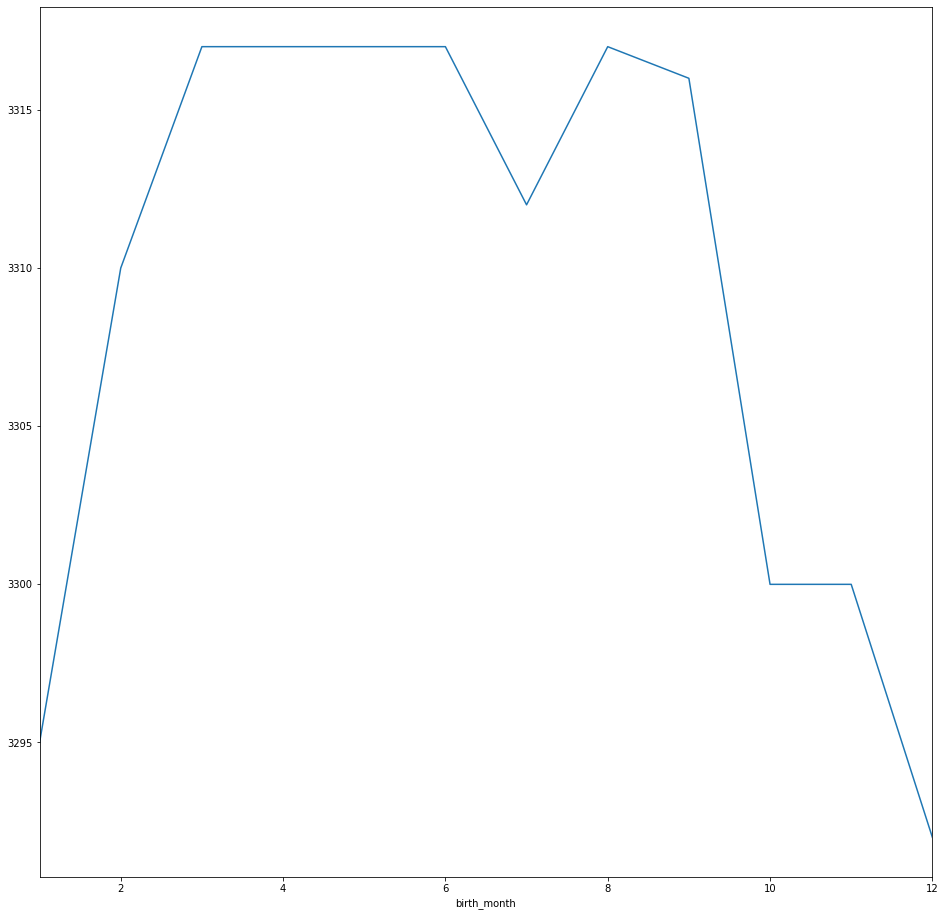

In [28]:
medwt_ts3 = babywt.groupby(['birth_month'])['birth_weight_gm'].median()

plt.figure(figsize=(16,16))
medwt_ts3.plot()

## Birth method 

In [ ]:
method  = (births[['birth_year', 'birth_month','final_delivery_method']])
# method.groupby('birth_year')

#Missingness
print(method['final_delivery_method'].value_counts())  #total missing 
print(method.groupby(['birth_year'])['final_delivery_method'].value_counts()) #missing per year


## Column cleaning  
Add to general cleaning file

In [ ]:
method2 = method.mask(method['final_delivery_method'] == ' ')
# method
# print('Masked method \n',method2['final_delivery_method'].value_counts())
# print('Unmasked method \n', method['final_delivery_method'].value_counts())
# births['final_delivery_method'] = pd.to_numeric(births['final_delivery_method'])
method2['final_delivery_method'] = method2['final_delivery_method'].astype(float)
method2.dtypes
method2.groupby(['birth_year'])['final_delivery_method'].value_counts()

In [ ]:
methodplt = method2.groupby(['birth_year'])['final_delivery_method'].value_counts()
methodplt.unstack().plot(logy = True, legend = False)

In [ ]:
methodplt = method2.groupby(['birth_month'])['final_delivery_method'].value_counts()
methodplt.unstack().plot(logy = True, legend = False)

In [ ]:
methodplt = method2.groupby(['birth_year','birth_month'])['final_delivery_method'].value_counts()
methodplt.unstack().plot(logy = True, legend = False)

## Place of birth trend

In [ ]:
place = (births[['birth_year', 'birth_month','birth_place']])

In [ ]:
print(place['birth_place'].value_counts()) #289573 missing
print(place.groupby(['birth_year'])['birth_place'].value_counts()) #missing per year

In [ ]:
place2 = place.mask(place['birth_place'] == ' ')
# place2
# print('Masked place \n', place2['birth_place'].value_counts())
place2['birth_place'] = place2['birth_place'].astype(float)
# method2.dtypes
place2.groupby(['birth_year'])['birth_place'].value_counts()

In [ ]:
placeplt = place2.groupby(['birth_year'])['birth_place'].value_counts()
placeplt.unstack().plot(logy = True, legend = False)

## NICU admissions


In [29]:
val_check(births, 'admit_NICU')

Value counts of admit_NICU 
 N    901475
Y     86441
U     12084
Name: admit_NICU, dtype: int64
Value counts of admit_NICU by year 
 birth_year  admit_NICU
2014.0      N             176434
            Y              15878
            U               7688
2015.0      N             179494
            Y              16701
            U               3805
2016.0      N             182334
            Y              17438
            U                228
2017.0      N             181688
            Y              18134
            U                178
2018.0      N             181525
            Y              18290
            U                185
Name: admit_NICU, dtype: int64


In [32]:
births['mothers_age_groups']= pd.cut(births['mothers_age'], 4, labels = ['12-19', '20-29', '30-39','40-50'])

In [14]:
births['admit_NICU'] = births['admit_NICU'].replace(' ', 'U')

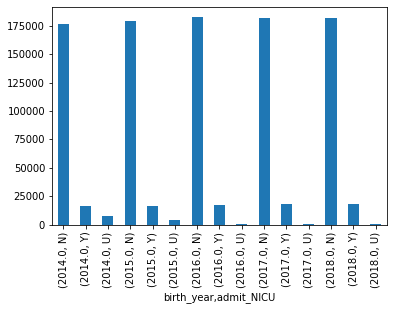

In [15]:
births.groupby('birth_year')['admit_NICU'].value_counts().plot(kind='bar')

In [16]:
plot_gpYR(births,'admit_NICU',"Year","Count of NICU admission", "Yearly NICU admittance",kind='line')

NameError: name 'plot_gpYR' is not defined

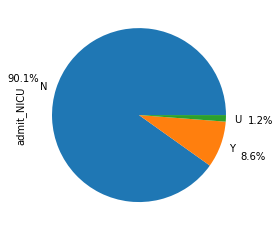

In [19]:
births['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', pctdistance = 1.4)


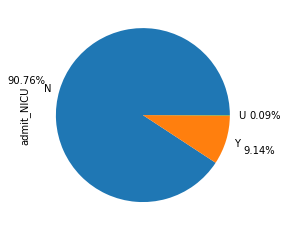

In [12]:
test = births.loc[births['birth_year']==2018]
test['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.2f%%', pctdistance = 1.4)


### Mother health factors
##### BMI and AGE

In [44]:
#data cleaning
births['mothers_bmi'] = pd.to_numeric(births['mothers_bmi'], errors = 'coerce')
births['mother_bmi_recode'] = pd.cut(births['mothers_bmi'],[10.0, 19.0, 25.0,30.0,35.0,40.0,90.0], right = False)


In [54]:
births['mother_bmirecode']

0         [19.0, 25.0)
1         [40.0, 90.0)
2         [30.0, 35.0)
3         [19.0, 25.0)
4         [19.0, 25.0)
              ...     
999995    [30.0, 35.0)
999996    [19.0, 25.0)
999997    [35.0, 40.0)
999998    [19.0, 25.0)
999999    [19.0, 25.0)
Name: mother_bmirecode, Length: 1000000, dtype: category
Categories (6, interval[float64]): [[10.0, 19.0) < [19.0, 25.0) < [25.0, 30.0) < [30.0, 35.0) < [35.0, 40.0) < [40.0, 90.0)]

In [53]:
# val_check(births,'mother_bmirecode')
births['mother_bmi_recode']

0         [19.0, 25.0)
1         [40.0, 90.0)
2         [30.0, 35.0)
3         [19.0, 25.0)
4         [19.0, 25.0)
              ...     
999995    [30.0, 35.0)
999996    [19.0, 25.0)
999997    [35.0, 40.0)
999998    [19.0, 25.0)
999999    [19.0, 25.0)
Name: mother_bmi_recode, Length: 1000000, dtype: category
Categories (6, interval[float64]): [[10.0, 19.0) < [19.0, 25.0) < [25.0, 30.0) < [30.0, 35.0) < [35.0, 40.0) < [40.0, 90.0)]

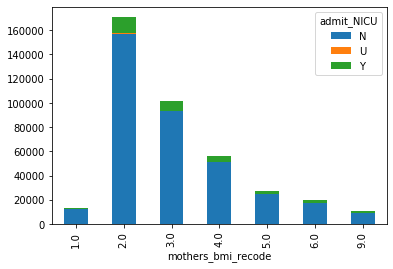

In [59]:
bmi_plt = births.groupby(['mothers_bmi_recode'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', stacked = True)

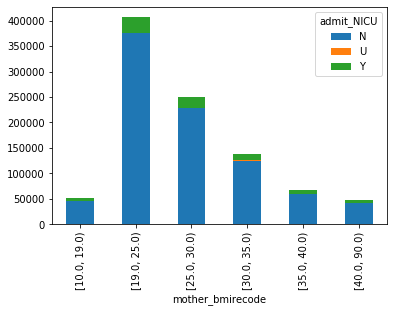

In [57]:
bmi_plt = births.groupby(['mother_bmirecode'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', stacked = True)

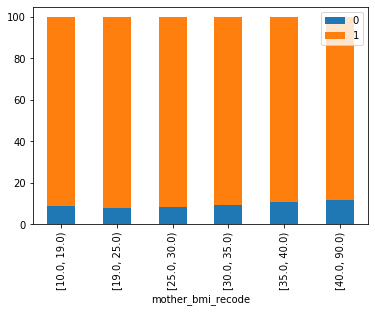

In [61]:
pct_bplot(births,'mother_bmi_recode')


In [ ]:
val_check()

In [ ]:
testvar = births.groupby(['mothers_bmi_recode'])[['admit_NICU']].count()

var2 =  births.groupby(['mothers_bmi_recode'])['admit_NICU'].value_counts().unstack()
var2 = var2.reindex(columns=columns_titles)
print(var2)
# print(type(testvar))
# print(testvar)
test_df3 = pd.merge(testvar,var2, left_index = True, right_index = True)
test_df3

In [23]:
def pct_bplot(dataframe, group = str, target = 'admit_NICU', column_title = ['Y','N'] ):
    df1 = dataframe.groupby([group])[[target]].count()
    df2 =  dataframe.groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=column_title)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    pct_df = pct_df.T
    pct_df.plot(kind = 'bar', stacked = True)

In [14]:
births.columns

Index(['Unnamed: 0', 'birth_year', 'birth_month', 'birth_time',
       'birth_day_of_wk', 'birth_place', 'mothers_age_imputed', 'mothers_age',
       'mothers_nativity', 'mothers_residence_status',
       ...
       'delivery_lbs_reporting', 'weight_gain', 'weight_gain_reporting',
       'pre_preg_diab_reporting', 'gest_diab_reporting',
       'pre_preg_hypten_reporting', 'gest_hypten_reporting',
       'hypten_ecl_reporting', 'prev_preterm_birth_reporting',
       'mothers_age_groups'],
      dtype='object', length=123)

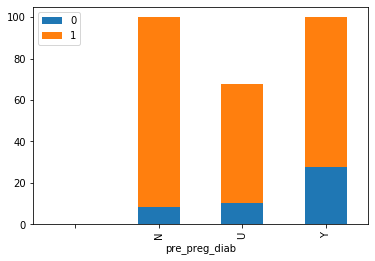

In [28]:
pct_bplot(births,'pre_preg_diab')


admit_NICU        Y         N
gest_diab                    
                NaN       NaN
N           78718.0  849135.0
U             109.0     620.0
Y            7614.0   51720.0


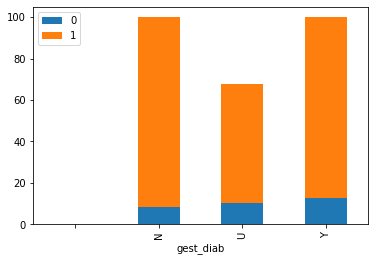

In [19]:
pct_bplot(births,'gest_diab')

In [ ]:
#Example code

df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
df2[['abuse','nff']].plot(kind='bar', stacked=True,autopct='%1.2f%%')

#percetnage barplot
sns.barplot(x='group', y='Values', data=df, estimator=lambda x: sum(x==0)*100.0/len(x))

totals = [i+j+k for i,j,k in zip(df['pre_score'], df['mid_score'], df['post_score'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(df['pre_score'], totals)]

In [ ]:
plot_gpYR(births,'mothers_bmi_recode','year','BMI', 'BMI trend')

## Testing helper functions

In [4]:
def val_check(data_frame, column_name = str):
    df = pd.DataFrame(data_frame)
    col = column_name
    print( "Value counts of %s \n" %(col), df[col].value_counts())
    print("Value counts of %s by year \n" %(col), df.groupby(['birth_year'])[col].value_counts())

In [5]:

def plotter(col):
    df[col].groupby(df['year'])[col].value.counts()
    col.plot(logy=True, legend = False
    xlabel
    ylabel
             

SyntaxError: invalid syntax (<ipython-input-5-77e4a0ea1d9a>, line 4)

In [ ]:
def map_plot(df):
    map(lamba col: plotter(col), col in df)

In [ ]:
def plot_gpYR(df,col,xlab,ylab,title,kind='line'):
    groupDF = df.groupby('birth_year')[col].value_counts().unstack()
    plt.figure(figsize=(20,20))
    groupDF.plot(kind=kind,logy=True, legend=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return

In [ ]:
def pct_bplot(dataframe, group = str, target = 'admit_NICU', column_title = ['Y','N'] ):
    df1 = dataframe.groupby([group])[[target]].count()
    df2 =  dataframe.groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    pct_df = pct_df.T
    test_df2.plot(kind = 'bar', stacked = True)